In [199]:
import os, glob, pandas as pd

from IPython.display import Image, display


In [200]:
listOfImageNames = ['ma-U.S.-14.jpg',
                    'ma-U.S.-7.jpg',
                    '7ma.png']


In [201]:
wdir = "C:/steve/covid/magrsave"
os.chdir(wdir)

In [202]:

#listOfImageNames = ['ma-U.S.-14.jpg',
#                    'ma-U.S.-7.jpg']

#for imageName in listOfImageNames:
#    display(Image(filename=imageName))

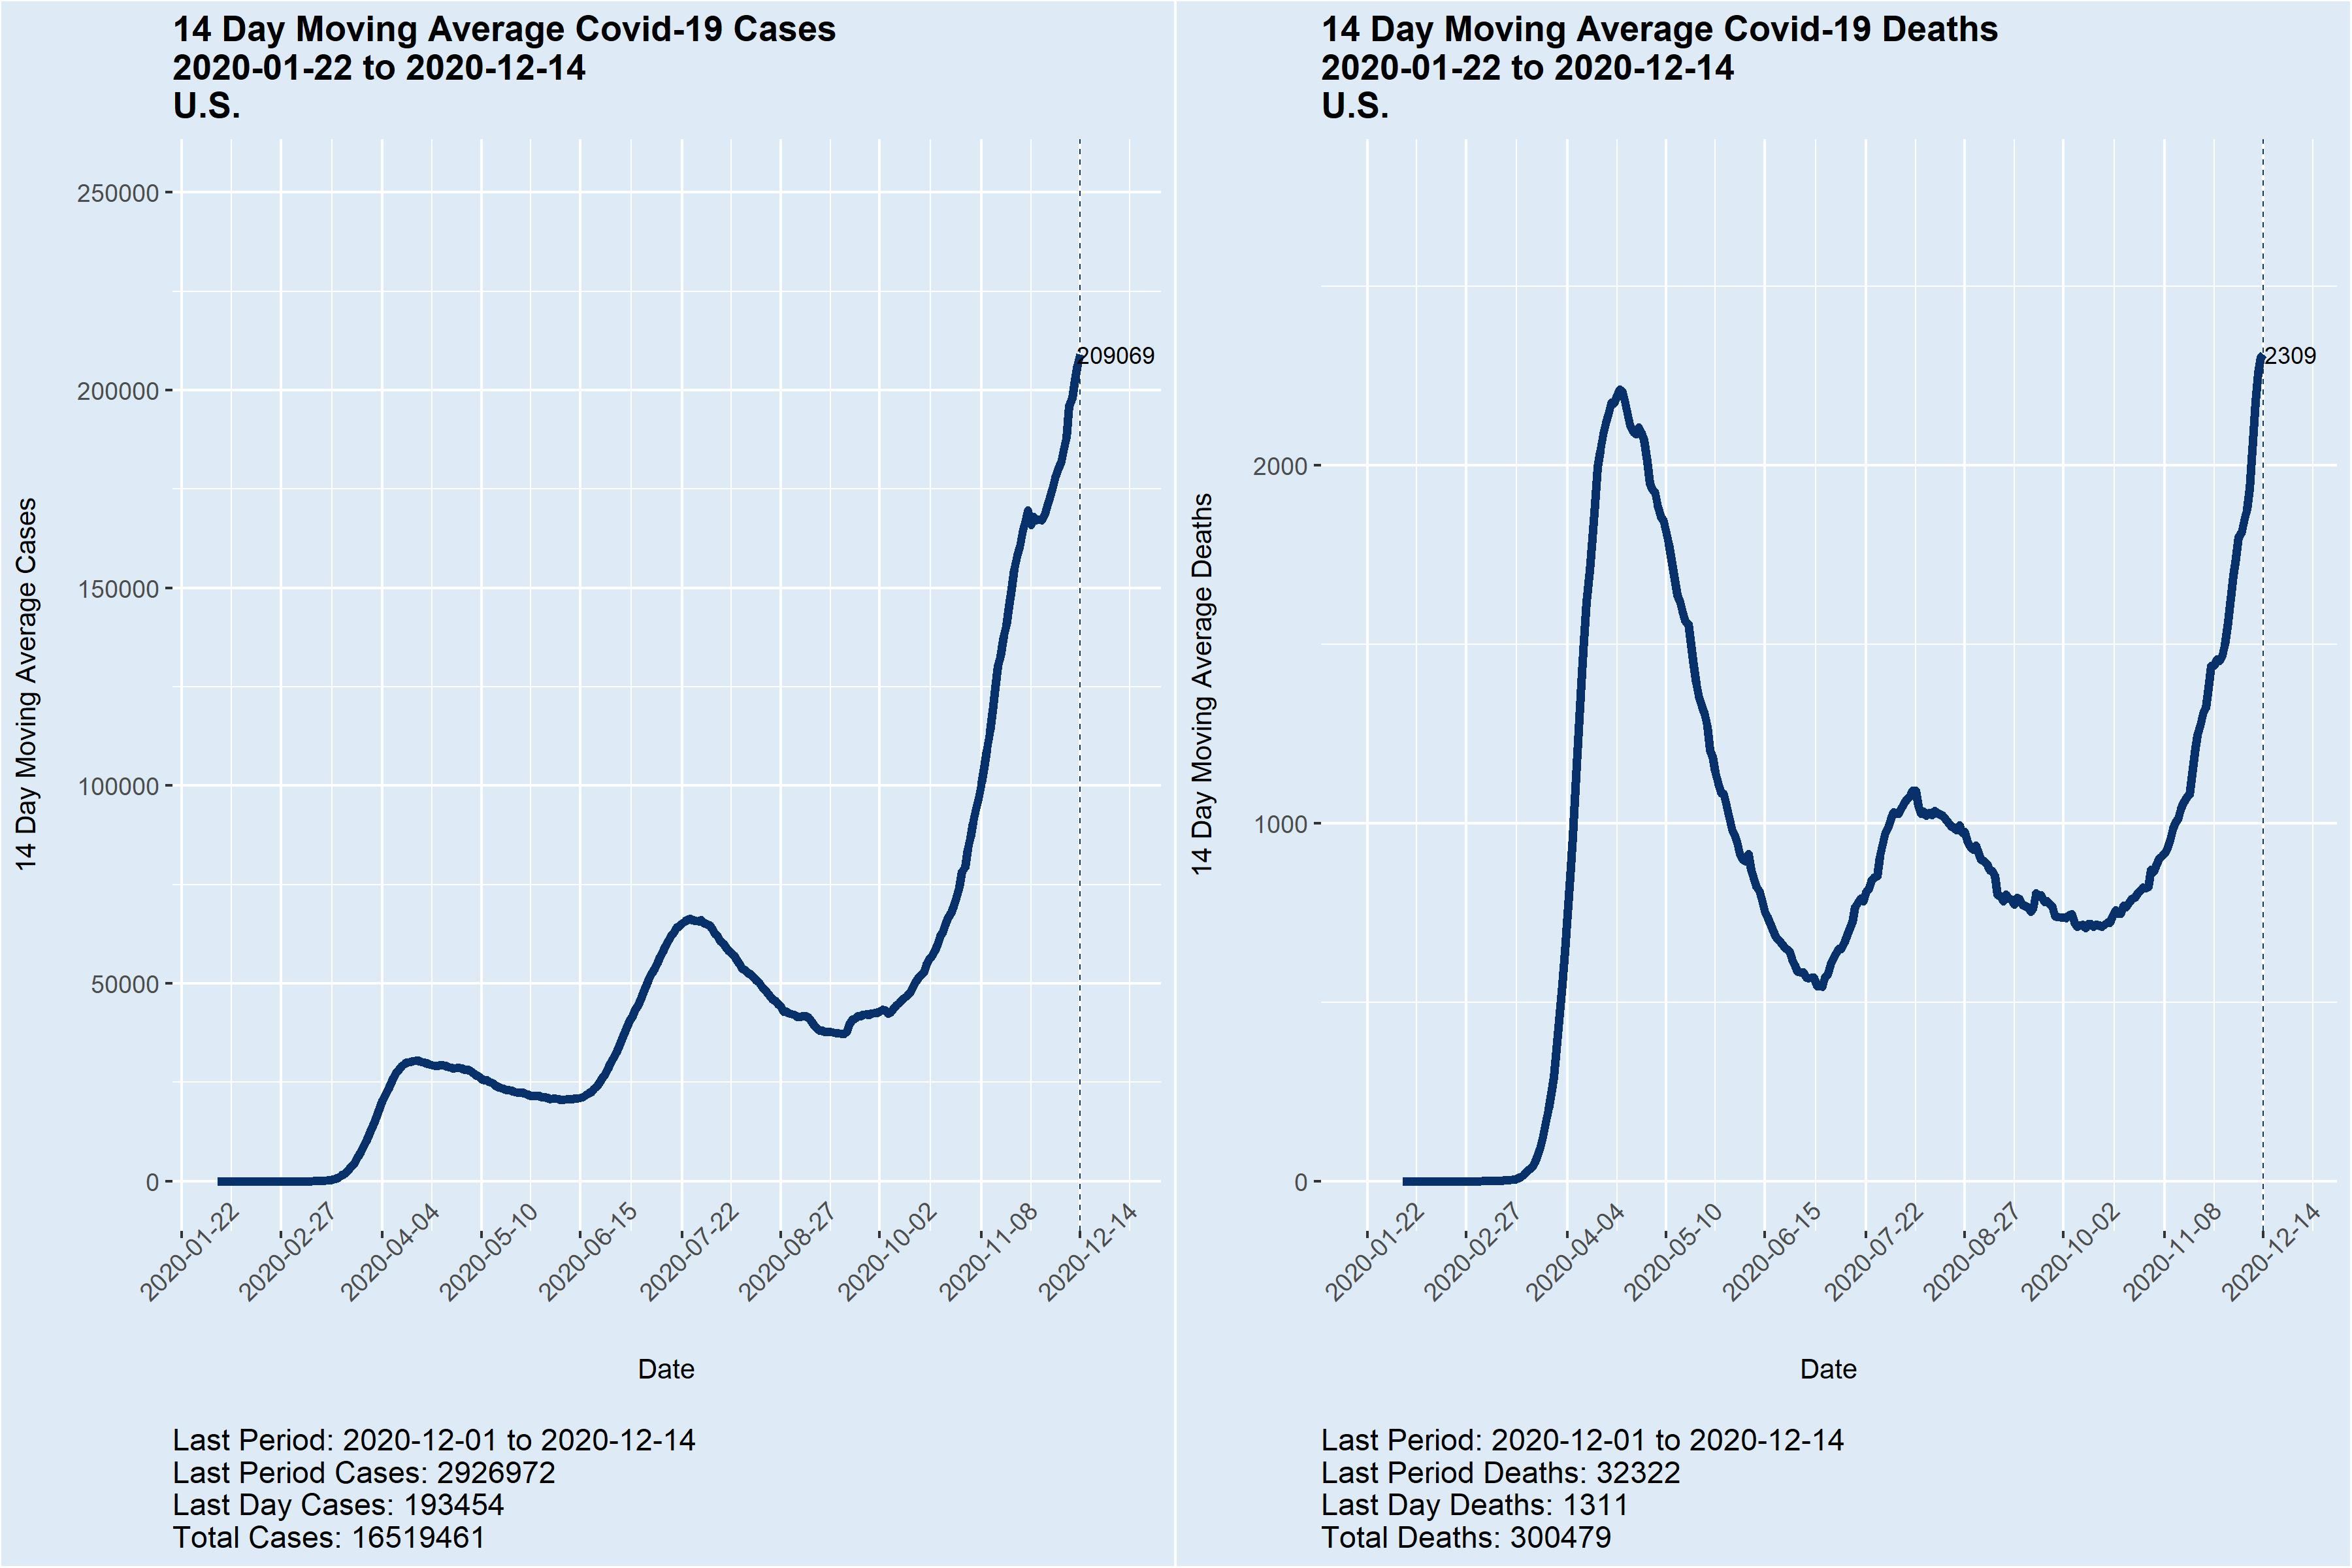

In [203]:

display(Image(filename=listOfImageNames[0]))

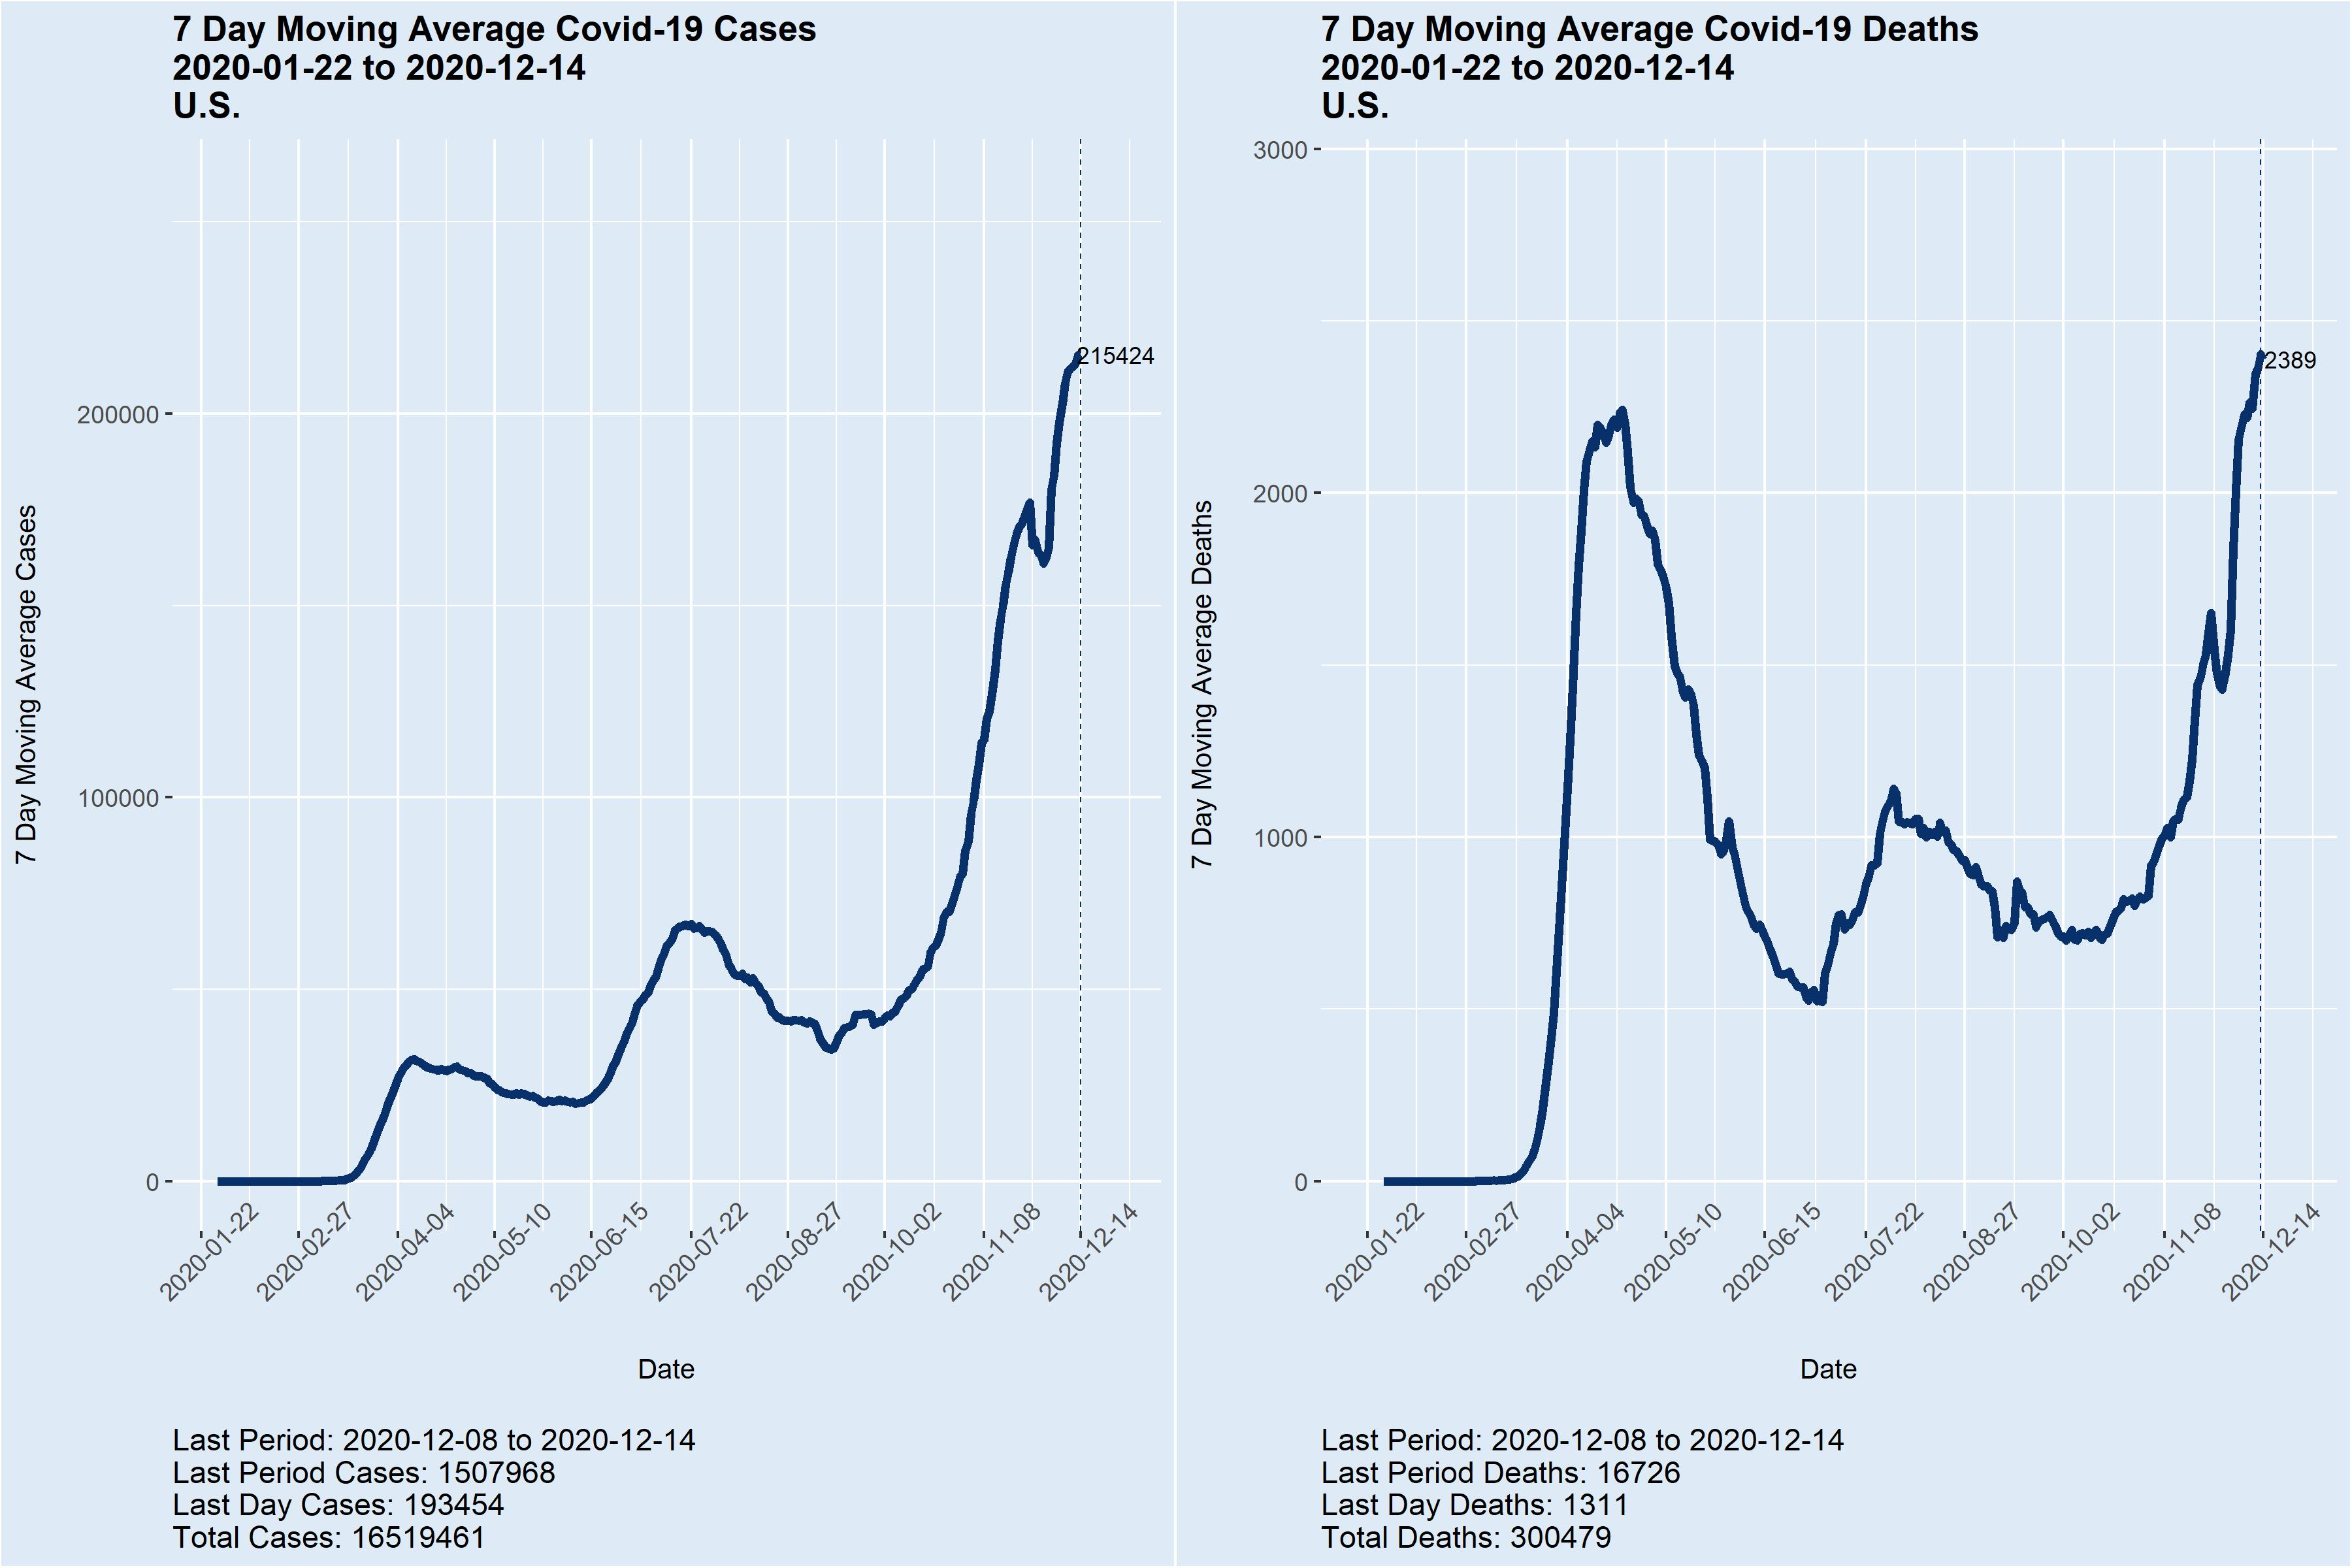

In [204]:
display(Image(filename=listOfImageNames[1]))

In [205]:
wdir = "C:/data/julia"
os.chdir(wdir)

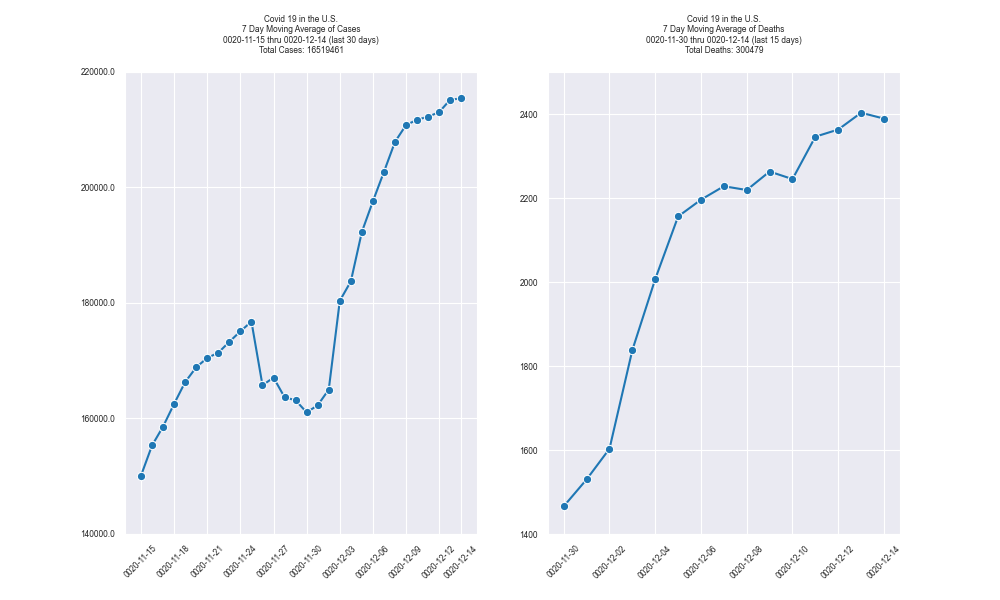

In [206]:
display(Image(filename=listOfImageNames[2]))

In [207]:
wdir = "C:/steve/covid/modeling"
os.chdir(wdir)

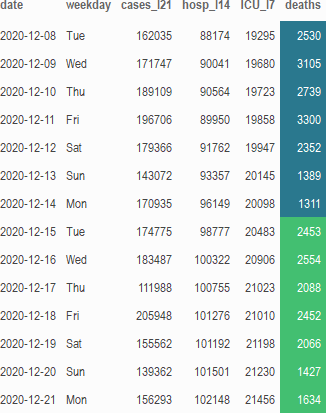

In [208]:

display(Image(filename=glob.glob('*.png')[-1]))

In [209]:
wdir = "C:/steve/covid/magrsave"
os.chdir(wdir)

jhufinal = pd.read_feather(glob.glob('*.feather')[-1])
jhufinal['date'] = jhufinal['date'].astype('datetime64[ns]')

In [210]:
print(jhufinal.head())

        uid iso2 iso3  code3     fips     admin2           state  \
0  84045001   US  USA    840  45001.0  Abbeville  South Carolina   
1  84045001   US  USA    840  45001.0  Abbeville  South Carolina   
2  84045001   US  USA    840  45001.0  Abbeville  South Carolina   
3  84045001   US  USA    840  45001.0  Abbeville  South Carolina   
4  84045001   US  USA    840  45001.0  Abbeville  South Carolina   

  country_region        lat      long_                   combined_key  \
0             US  34.223334 -82.461707  Abbeville, South Carolina, US   
1             US  34.223334 -82.461707  Abbeville, South Carolina, US   
2             US  34.223334 -82.461707  Abbeville, South Carolina, US   
3             US  34.223334 -82.461707  Abbeville, South Carolina, US   
4             US  34.223334 -82.461707  Abbeville, South Carolina, US   

        date  cumcases  daycases  population  cumdeaths  daydeaths  
0 2020-01-22         0       NaN       24527          0        NaN  
1 2020-01-23  

In [211]:
print(jhufinal.dtypes)

uid                        int32
iso2                    category
iso3                    category
code3                      int32
fips                     float64
admin2                  category
state                   category
country_region          category
lat                      float64
long_                    float64
combined_key            category
date              datetime64[ns]
cumcases                   int32
daycases                 float64
population                 int32
cumdeaths                  int32
daydeaths                float64
dtype: object


In [212]:
vars = ['date','daycases','daydeaths']
jhubydate = jhufinal[vars].groupby(by=vars[0], dropna=False).sum().reset_index()
jhubydate['cumcases'] = jhubydate['daycases'].sum()
jhubydate['cumdeaths'] = jhubydate['daydeaths'].sum()

var = ['daycases']
jhubydate['daycasesma7'] = jhubydate[var].rolling(window=7).mean().round()

var = ['daydeaths']
jhubydate['daydeathsma7'] = jhubydate[var].rolling(window=7).mean().round()

print(jhubydate.dtypes)

date            datetime64[ns]
daycases               float64
daydeaths              float64
cumcases               float64
cumdeaths              float64
daycasesma7            float64
daydeathsma7           float64
dtype: object


In [213]:
print(jhubydate.tail(1))

          date  daycases  daydeaths    cumcases  cumdeaths  daycasesma7  \
327 2020-12-14  193454.0     1311.0  16519461.0   300479.0     215424.0   

     daydeathsma7  
327        2389.0  


In [214]:
last = jhubydate.tail(1)
last.dtypes

date            datetime64[ns]
daycases               float64
daydeaths              float64
cumcases               float64
cumdeaths              float64
daycasesma7            float64
daydeathsma7           float64
dtype: object

In [215]:
import datetime

def mkforecast(last,todte):
    forecast = pd.DataFrame(dict(fromdte=last.date,todte=datetime.datetime.strptime(todte,'%Y-%m-%d'),deathsma7=last.daydeathsma7,cumdeaths=last.cumdeaths))
    forecast['days'] = (forecast.todte-forecast.fromdte).dt.days
    forecast['newdeaths'] = forecast.days*forecast.deathsma7
    forecast['forecastdeaths'] = forecast['newdeaths'] + last.cumdeaths

    return(forecast[['fromdte','todte','days','deathsma7','cumdeaths','newdeaths','forecastdeaths']])
#    return(forecast)



In [216]:
print(mkforecast(last,"2020-12-31"),"\n\n")
print(mkforecast(last,"2021-01-21"))

       fromdte      todte  days  deathsma7  cumdeaths  newdeaths  \
327 2020-12-14 2020-12-31    17     2389.0   300479.0    40613.0   

     forecastdeaths  
327        341092.0   


       fromdte      todte  days  deathsma7  cumdeaths  newdeaths  \
327 2020-12-14 2021-01-21    38     2389.0   300479.0    90782.0   

     forecastdeaths  
327        391261.0  
